In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [4]:
#Membaca dataset
dataset = 'diabetes_data_upload.csv'
data = pd.read_csv(dataset)

# Menampilkan beberapa baris pertama dari dataset
print(data.head())

   Age Gender Polyuria Polydipsia suddenweightloss weakness Polyphagia  \
0   40   Male       No        Yes               No      Yes         No   
1   58   Male       No         No               No      Yes         No   
2   41   Male      Yes         No               No      Yes        Yes   
3   45   Male       No         No              Yes      Yes        Yes   
4   60   Male      Yes        Yes              Yes      Yes        Yes   

  Genitalthrush visualblurring Itching Irritability delayedhealing  \
0            No             No     Yes           No            Yes   
1            No            Yes      No           No             No   
2            No             No     Yes           No            Yes   
3           Yes             No     Yes           No            Yes   
4            No            Yes     Yes          Yes            Yes   

  partialparesis musclestiffness Alopecia Obesity     class  
0             No             Yes      Yes     Yes  Positive  
1         

In [5]:
# Identifikasi nilai yang hilang
missing_values = data.isnull()

#Menampilkan data yang tidak memiliki nilai
nilai_hilang = data[missing_values.any(axis=1)]

# Menampilkan baris data yang memiliki nilai yang hilang
print("Data yang memiliki nilai hilang:")
print(nilai_hilang)

Data yang memiliki nilai hilang:
Empty DataFrame
Columns: [Age, Gender, Polyuria, Polydipsia, suddenweightloss, weakness, Polyphagia, Genitalthrush, visualblurring, Itching, Irritability, delayedhealing, partialparesis, musclestiffness, Alopecia, Obesity, class]
Index: []


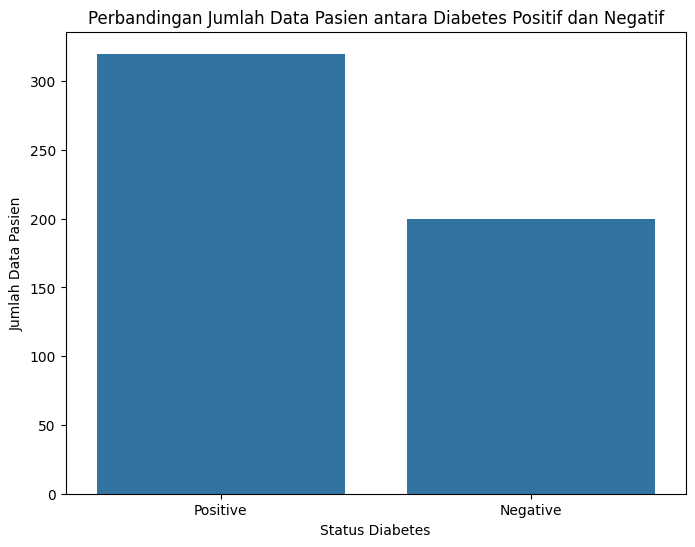

In [6]:
# Menghitung jumlah data pasien yang memiliki diabetes positif dan negatif
count_plot_data = data['class'].value_counts().reset_index()
count_plot_data.columns = ['class', 'count']

# Memvisualisasikan perbandingan jumlah data umur antara diabetes positif dan negatif
plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='count', data=count_plot_data)
plt.title('Perbandingan Jumlah Data Pasien antara Diabetes Positif dan Negatif')
plt.xlabel('Status Diabetes')
plt.ylabel('Jumlah Data Pasien')
plt.show()

<ipython-input-7-54f4daae1bdd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='class', y='Age', data=data, estimator='mean', ci=None)


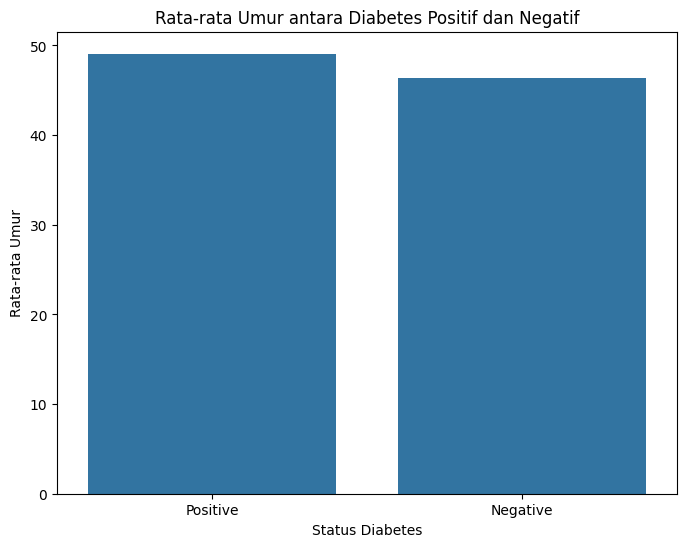

In [7]:
# Memvisualisasikan rata-rata umur antara diabetes positif dan negatif
plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='Age', data=data, estimator='mean', ci=None)
plt.title('Rata-rata Umur antara Diabetes Positif dan Negatif')
plt.xlabel('Status Diabetes')
plt.ylabel('Rata-rata Umur')
plt.show()

<ipython-input-8-da0ac6399ca0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gejala_count.values, y=gejala_count.index, palette='viridis')


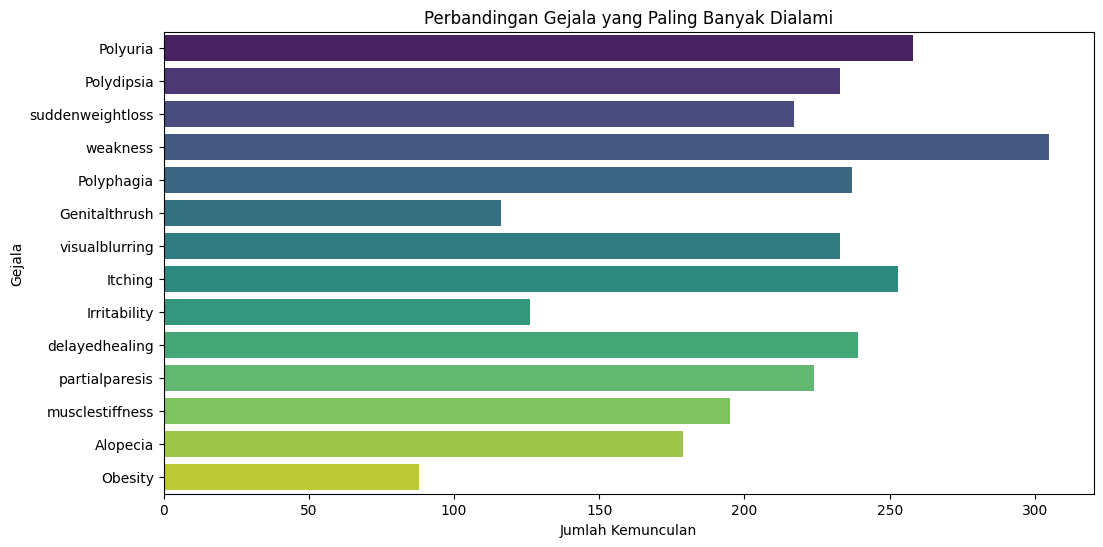

In [8]:
# Membuat subset dataset hanya untuk gejala (kolom 2 hingga 14)
gejala_data = data.iloc[:, 2:16]

# Menghitung jumlah kemunculan "Yes" untuk setiap gejala
gejala_count = gejala_data.apply(lambda x: x.value_counts()['Yes'])

# Memvisualisasikan perbandingan gejala yang paling banyak dialami (horizontal bar plot)
plt.figure(figsize=(12, 6))
sns.barplot(x=gejala_count.values, y=gejala_count.index, palette='viridis')
plt.title('Perbandingan Gejala yang Paling Banyak Dialami')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Gejala')
plt.show()

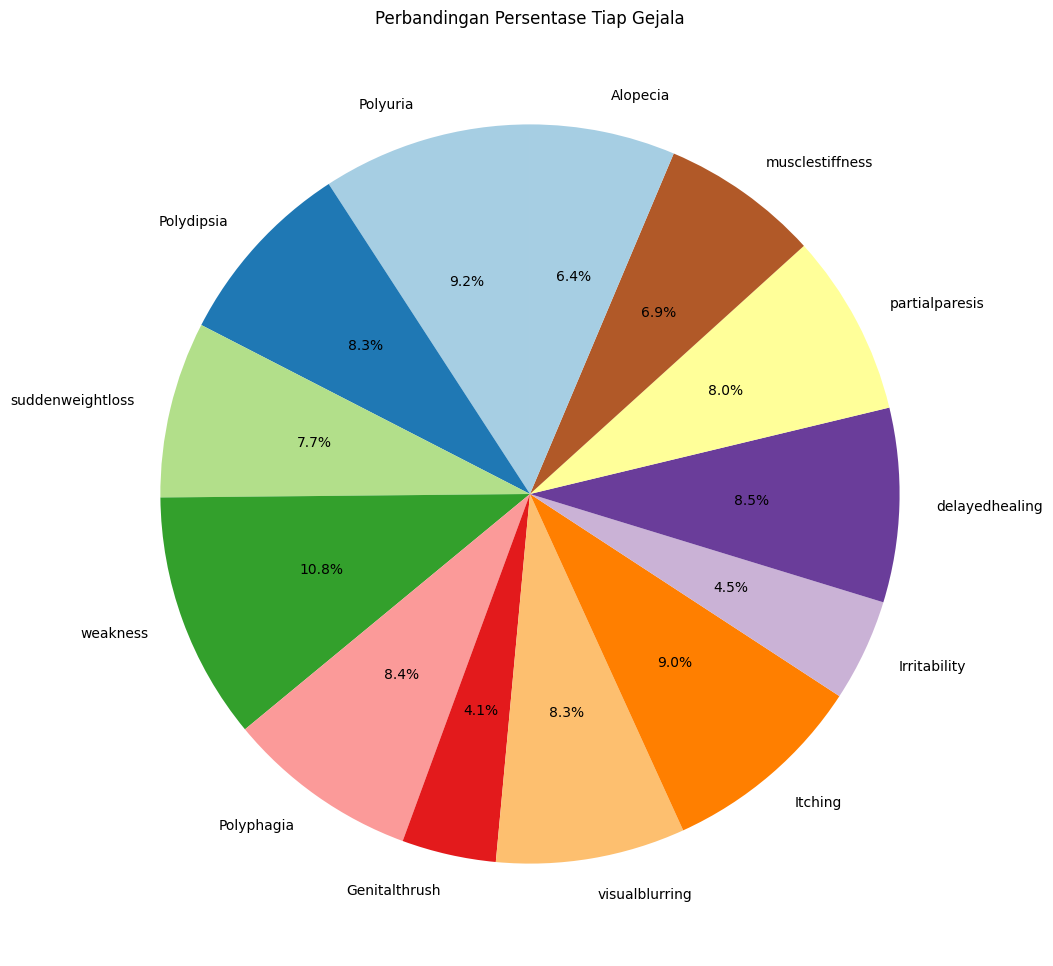

In [9]:
# Membuat subset dataset hanya untuk gejala (kolom 2 hingga 14)
gejala_data = data.iloc[:, 2:15]

# Menghitung persentase kemunculan "Yes" untuk setiap gejala
gejala_percentage = gejala_data.apply(lambda x: x.value_counts(normalize=True)['Yes'] * 100)

# Memvisualisasikan perbandingan persentase tiap gejala dengan pie chart
plt.figure(figsize=(12, 12))
plt.pie(gejala_percentage, labels=gejala_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Perbandingan Persentase Tiap Gejala')
plt.show()

In [10]:
import pickle

In [11]:
# Memuat data diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
classifier = LinearRegression()
classifier.fit(X_train, y_train)

# Menyimpan model ke file .sav
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

# Mengunduh file .sav
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>